Hypothesis Testing: 
1) Phone Time vs Study Time: r = 0.007, p = 0.9473
❌ No statistically significant correlation: Daily phone time does not affect study time.
2) Phone Distractions vs Study Time: r = 0.703, p = 0.0000
✅ Statistically significant strong correlation: More study time may lead to more distractions.
3) Weekly Exam Count vs Study Time: r = 0.426, p = 0.00001
✅ Statistically significant moderate correlation: More exams are associated with more study time.


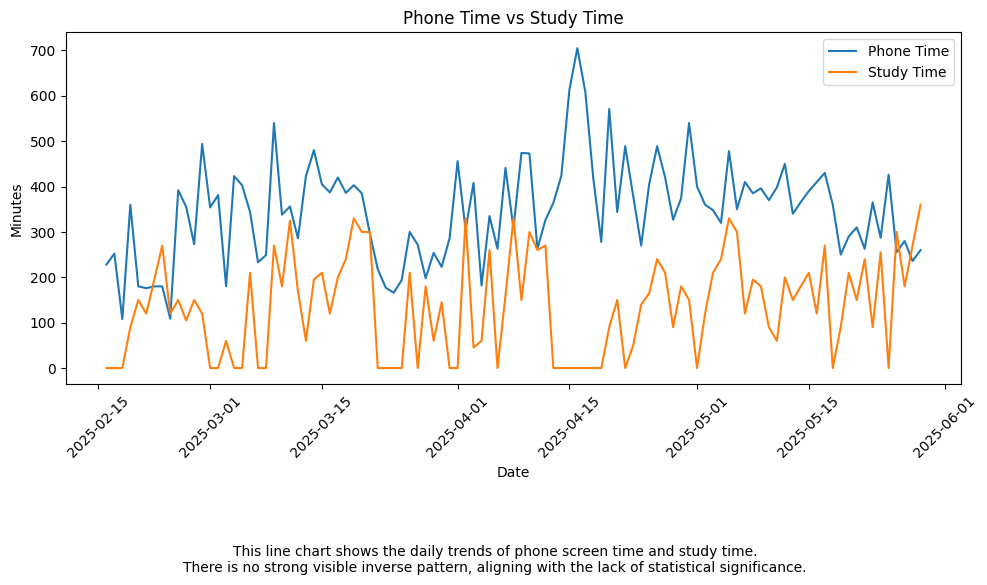

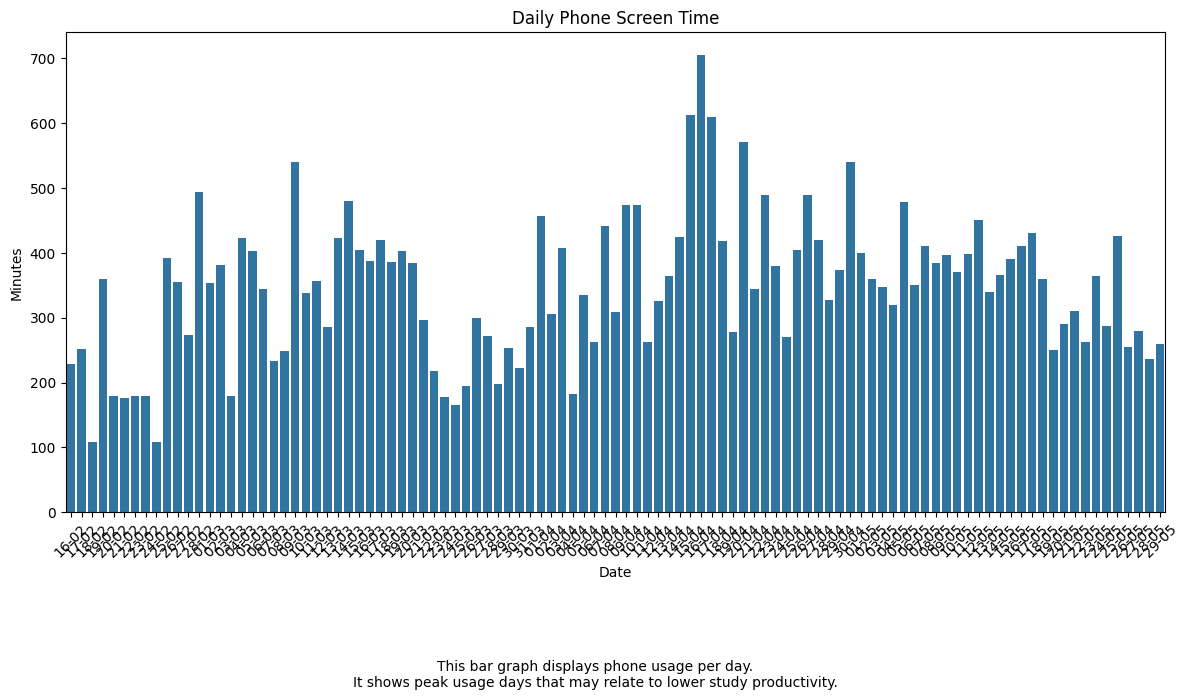

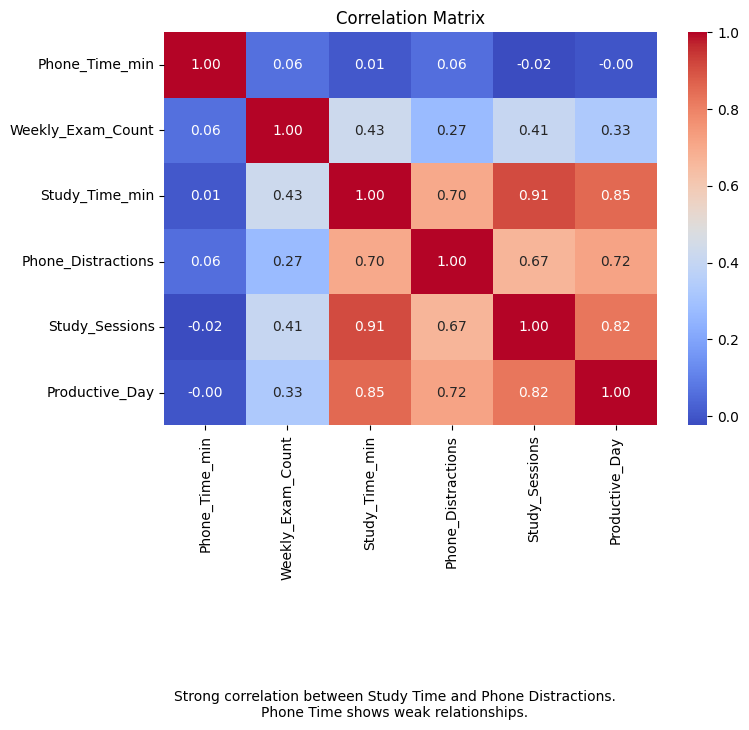

[ML] Random Forest Regression Model - Predicting Study Sessions
Features used: ['Phone_Time_min', 'Phone_Distractions', 'Study_Time_min', 'Weekly_Exam_Count']
Mean Squared Error: 0.721
R² Score: 0.364


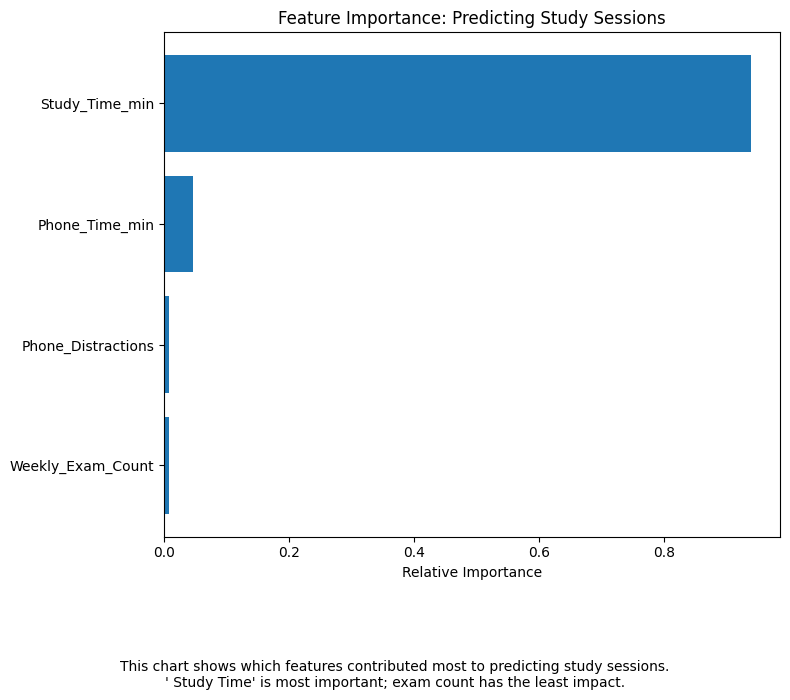

In [ ]:
# DSA210 Term Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Data File
# ----------------------
df = pd.read_csv('screen_study_data_full.3.csv', delimiter=';')

# Step 2: Data Cleaning
# ---------------------
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna()
df['Productive_Day'] = (df['Study_Time_min'] >= 120).astype(int)

# Step 3: Hypothesis Testing
# ---------------------------
print("Hypothesis Testing: ")
# Hypothesis 1: Increase of phone time negatively affects the study time.
r1, p1 = pearsonr(df['Phone_Time_min'], df['Study_Time_min'])
print("1) Phone Time vs Study Time: r = {:.3f}, p = {:.4f}".format(r1, p1))
if p1 < 0.05:
    print("\u2705 Statistically significant correlation.")
else:
    print("\u274C No statistically significant correlation: Daily phone time does not affect study time.")

# Hypothesis 2: Increase in study time leads to more phone distractions.
r2, p2 = pearsonr(df['Phone_Distractions'], df['Study_Time_min'])
print("2) Phone Distractions vs Study Time: r = {:.3f}, p = {:.4f}".format(r2, p2))
if p2 < 0.05:
    print("\u2705 Statistically significant strong correlation: More study time may lead to more distractions.")
else:
    print("\u274C No statistically significant correlation.")

# Hypothesis 3: Weekly exam count increases study time.
r3, p3 = pearsonr(df['Weekly_Exam_Count'], df['Study_Time_min'])
print("3) Weekly Exam Count vs Study Time: r = {:.3f}, p = {:.5f}".format(r3, p3))
if p3 < 0.05:
    print("\u2705 Statistically significant moderate correlation: More exams are associated with more study time.")
else:
    print("\u274C No statistically significant correlation.")

# Step 4: Visualizations
# -----------------------
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Phone_Time_min'], label='Phone Time')
plt.plot(df['Date'], df['Study_Time_min'], label='Study Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.title('Phone Time vs Study Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.figtext(0.5, -0.15, "This line chart shows the daily trends of phone screen time and study time.\nThere is no strong visible inverse pattern, aligning with the lack of statistical significance.", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=df['Date'].dt.strftime('%d-%m'), y=df['Phone_Time_min'])
plt.title('Daily Phone Screen Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.figtext(0.5, -0.15, "This bar graph displays phone usage per day.\nIt shows peak usage days that may relate to lower study productivity.", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.figtext(0.5, -0.2, "Strong correlation between Study Time and Phone Distractions.\nPhone Time shows weak relationships.", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

# Step 5: Machine Learning – Predict Study Sessions
# ------------------------------------------------------
print("[ML] Random Forest Regression Model - Predicting Study Sessions")
features = ['Phone_Time_min', 'Phone_Distractions', 'Study_Time_min', 'Weekly_Exam_Count']
X = df[features]
y = df['Study_Sessions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Features used:", features)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# Step 6: ML Visualization
# -------------------------
importances = regressor.feature_importances_
feature_names = X.columns
indices = importances.argsort()

plt.figure(figsize=(8, 6))
plt.title("Feature Importance: Predicting Study Sessions")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.figtext(0.5, -0.15, "This chart shows which features contributed most to predicting study sessions.\n' Study Time' is most important; exam count has the least impact.", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()
